### sample is classified by a popularity of it's nearest neighbours

In [43]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from collections import Counter

In [44]:
# load data, or actually...create my own
from data_generation import GenerateDatasets

dataset = GenerateDatasets()
dataset = dataset.make_blobs(nr_blobs=4,
                   nr_samples=1000,
                   nr_cols=2,
                   size_left=1,
                   mode=1.5,
                   size_right=2,
                   scale_row=1,
                   scale_col=1,
                   random_seed=True)
X, y = dataset

In [45]:
# split data

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [46]:
X[:10], y[:10]

(array([[2.56871585, 2.75720506],
        [1.67732136, 1.34330158],
        [1.54403719, 1.13019699],
        [2.1500759 , 2.57458235],
        [1.62490189, 1.33601542],
        [2.90896559, 2.83635684],
        [3.63745894, 1.25023241],
        [4.51620057, 2.38025632],
        [2.42833809, 2.34016479],
        [1.52174503, 1.86565068]]),
 array([1, 0, 0, 1, 0, 1, 2, 3, 1, 0]))

In [47]:
X_train.shape, X_test.shape 

((800, 2), (200, 2))

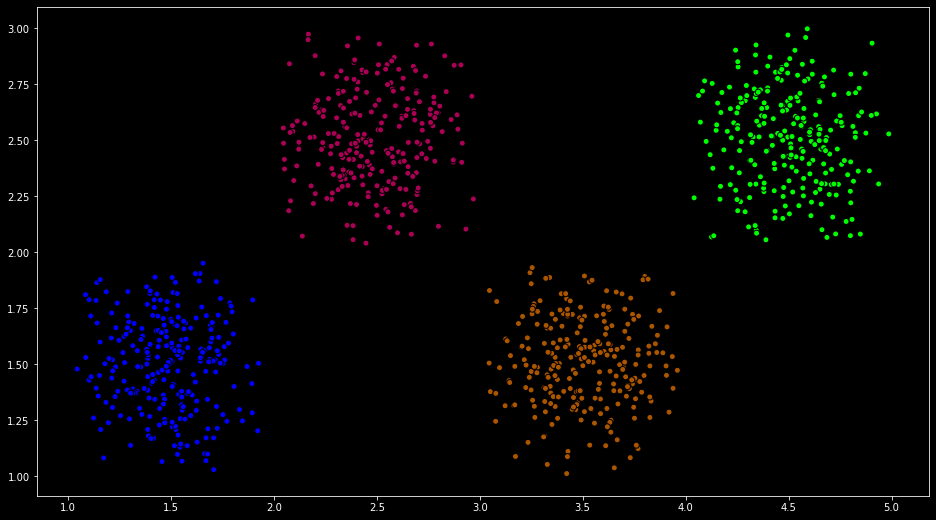

In [48]:
plt.style.use("dark_background")
plt.figure(figsize=(16, 9))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap="brg", edgecolors="k")
plt.show()

In [49]:
len(X), len(y)

(1000, 1000)

In [50]:
X_train[0]

array([2.52439385, 2.36174166])

In [51]:
y_train[0]

1

In [52]:
# eucledeam distance to calculate distances between vectors
# I can confirm that it works on vectors, tested it my self

def euclidean_distance(x1, x2):
    return np.sqrt(np.sum((x1 - x2) ** 2))

In [53]:
class KNearestNeighbours:
    def __init__(self, k=3, verbose=False):
        """K: Number of nearest neighbours"""
        self.k = k
        self.X_train = None
        self.y_train = None
        self.verbose = verbose

    def fit(self, X, y):
        self.X_train = X
        self.y_train = y

    def predict(self, X_test):
        # this comprehension will go through every item and return label based on
        #    k most common labels around it
        # self._predict here is done on each vector of X_test
        predicted_labels = [self._predict(test_item) for test_item in X_test]

        if self.verbose:
            print("shape", X_test.shape)
            print(np.array(predicted_labels).shape)
            print("predicted labels", predicted_labels[:5])
        return np.array(predicted_labels)

    def _predict(self, test_item):
        # compute distances of a given item from X_test to every point in X_train.
        # TODO: Why compare it to X_train and not X_test???
        distances = [euclidean_distance(x1=test_item, x2=train_item) for train_item in self.X_train]

        
        # get k nearest samples, labels
        # arg sort returns indexes in order as the integers are aligned (from smallest) in original list
        # the indexes will be used to return by index item from y_train
        k_indices = np.argsort(distances)[:self.k]

        k_nearest_labels = [self.y_train[index] for index in k_indices]

        # majority vote, most common class label in k nearest neighbours
        most_common = Counter(k_nearest_labels).most_common(1)

        if self.verbose:
            print("distances", distances[:5])
            print("k_indices", k_indices)
            print("k_nearest_labels", k_nearest_labels)
            print("most_common", most_common[0][0])
            print("-"*20)
        return most_common[0][0]
    

In [54]:
classifier = KNearestNeighbours(k=3)
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test=X_test)
accuracy = np.sum(y_pred==y_test) / len(y_test)


In [55]:
# result in % (1 = 100%)
accuracy

1.0

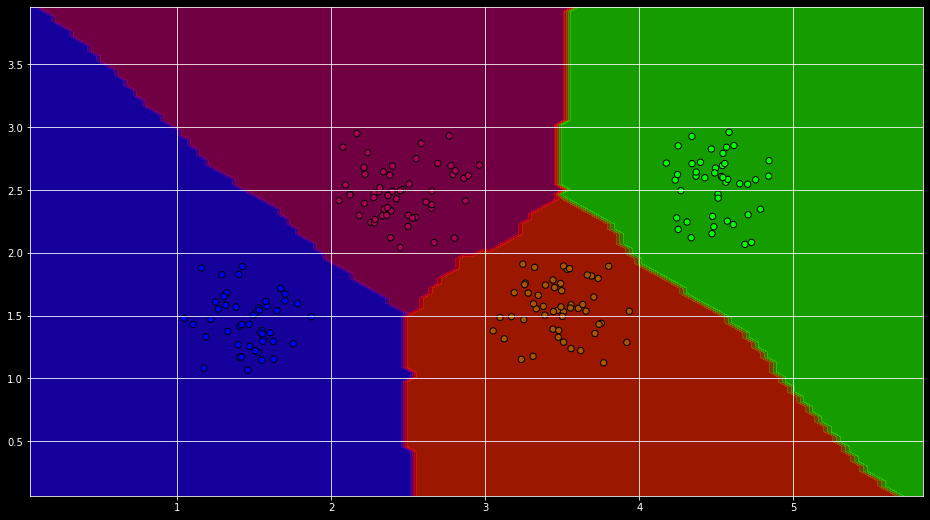

In [56]:
from data_plotting import Plots

plot = Plots()
plot.plot_decision_boundary(classifier,
                           X_test,
                           y_test,
                           expand=1,
                           bound_smoot=100,
                           fig_size=(16, 9),
                           grid=True,
                           verbose=False,
                           cmap="brg")